# Carga Archivos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import  drive
drive.mount('/drive')
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1MWuzLdvsM3sNklWE-4VKsdhDCzUR-yca"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train') 
downloaded = drive.CreateFile({'id':"1ycXSAi-U1WwVXd1XPJPy6WvKt0Mla9Li"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test') 

Mounted at /drive


In [ ]:
df = pd.read_parquet("train")
len(df)

35663

In [ ]:
test = pd.read_parquet("test")

In [ ]:
len(test)

3981

In [ ]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# analisis de las columnas


### timedelta
es posible que a medida que va pasando el tiempo la gente que tiene acceso a internet crezca, por lo tanto que las visitas crezcan y por lo tanto los shares crezcan, asi que los ordeno



### info del articulo
 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords'                

variables numericas, no necesario feature enginering




### tipo de articulo - one hot encoding

'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'



###  dia de semana - one hot encoding

 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday' 



### variables procesamiento de texto
  variables que pasaron por un algoritmo de procesamiento y dieron estos resultado de tipo numerico

  'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',



### Content

variable que contiene todo el articulo, para pasar por un algoritmo para obtener mas features



### Surprise

2 columnas (surprise1', 'surprise2') que contienen data sobre el articulo, para sacar features

# Orden del dataset

In [ ]:
df = df.sort_values("timedelta", ascending=False).reset_index()
test = test.sort_values("timedelta", ascending=False).reset_index()

# segmentar dataset

Lo primero que voy a hacer es crear set de validacion, aplico features en train y despues lo transformo en valid y test (por el timedelta)

In [ ]:
df_train = df[:int(0.9 * len(df))]
df_valid = df[int(0.9 * len(df)):]

In [ ]:
x_train = df_train.drop(['url', 'timedelta', 'popular', 'shares',"index"], axis=1)
y_train = df_train["popular"]

x_valid = df_valid.drop(['url', 'timedelta', 'popular', 'shares',"index"], axis=1)
y_valid = df_valid["popular"]

x_test = test.drop(['url', 'timedelta', 'popular', 'shares',"index"], axis=1)
y_test = test["popular"]

len(x_train), len(y_train), len(x_valid), len(y_valid), len(x_test), len(y_test)

(32096, 32096, 3567, 3567, 3981, 3981)

# Llenado de nulos

In [ ]:
len(x_train)

32096

In [ ]:
x_train.count()[x_train.count() != len(x_train)] # variables con algun dato nulo

n_tokens_title                  32095
n_tokens_content                32094
n_non_stop_words                32095
n_non_stop_unique_tokens        32094
num_hrefs                       32093
num_self_hrefs                  32094
num_imgs                        32093
num_videos                      32090
num_keywords                    32095
data_channel_is_bus             32095
data_channel_is_socmed          32094
data_channel_is_tech            32095
kw_min_min                      32094
kw_max_min                      32095
kw_avg_min                      32095
kw_min_max                      32095
kw_max_max                      32094
kw_min_avg                      32095
self_reference_avg_sharess      32095
weekday_is_monday               32092
weekday_is_tuesday              32093
weekday_is_wednesday            32094
weekday_is_friday               32094
weekday_is_saturday             32095
LDA_00                          32094
LDA_01                          32095
LDA_02      

##Como llenarlas?

**Variables numericas** : procedo a hacerle un mean a toda la columna y asigno ese valor

**OHE**: Me fijo las otras columnas que se relacionan con el, si son todos 0, le asigno 1, caso contrario 0

content: aca directamente podria dropear las filas (2)


In [ ]:
def completarOHE(df,subDf):
  k=0
  for row in  subDf.values:
    if np.isnan(row).any():
      if row[~np.isnan(row)].sum():
        row = np.nan_to_num(row, nan=0)
      else:
        row = np.nan_to_num(row, nan=1)
    subDf.values[k] = row
    k+=1
  for col in subDf.columns:
    df[col] = subDf[col]

In [ ]:
ohe1_x_train = x_train[['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']]
ohe2_x_train = x_train[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"]]

In [ ]:
ohe1_x_valid = x_valid[['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']]
ohe2_x_valid = x_valid[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"]]

In [ ]:
ohe1_x_test = x_test[['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']]
ohe2_x_test = x_test[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"]]

In [ ]:
completarOHE(x_train,ohe1_x_train)
completarOHE(x_train,ohe2_x_train)

In [ ]:
completarOHE(x_valid,ohe1_x_valid)
completarOHE(x_valid,ohe2_x_valid)

In [ ]:
completarOHE(x_test,ohe1_x_test)
completarOHE(x_test,ohe2_x_test)

In [ ]:
def completarNulosNumericos(df, x_train):
  ''' aca tengo que completar todos los na con valores de train!! '''
  for column in df.columns:
    if df[column].dtype == "float64":
      df[column].fillna(x_train[column].mean(), inplace=True)

In [ ]:
completarNulosNumericos(x_train, x_train)

In [ ]:
completarNulosNumericos(x_valid, x_train)

In [ ]:
completarNulosNumericos(x_test, x_train)

In [ ]:
x_train.count()[x_train.count() != len(x_train)] # variables con algun dato nulo

content    32095
dtype: int64

Solo me quedan ahora los content, que los voy a dropear

In [ ]:
na_values_train = x_train[x_train['content'].isna()].index
na_values_valid = x_valid[x_valid['content'].isna()].index
na_values_test = x_test[x_test['content'].isna()].index

In [ ]:
x_train = x_train.dropna().reset_index()
x_valid = x_valid.dropna().reset_index()
x_test = x_test.dropna().reset_index()

In [ ]:
y_train = y_train.drop(na_values_train).reset_index()["popular"]
y_valid = y_valid.drop(na_values_valid).reset_index()["popular"]
y_test = y_test.drop(na_values_test).reset_index()["popular"]

In [ ]:
del x_train["index"]
del x_valid["index"]
del x_test["index"]

Ahora el df me queda de 35661 filas

In [ ]:
len(x_train), len(x_valid), len(x_test)

(32095, 3566, 3980)

# Variables "info del articulo": algunos problemas

algunas filas del df tiene el error de tener las variables del info del articulo en 0, las corrijo para no tener error

In [ ]:
import nltk
nltk.download("punkt")
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


paso todo a lower de antemano

In [ ]:
x_train["content"] = x_train["content"].apply(lambda x: x.lower())
x_valid["content"] = x_valid["content"].apply(lambda x: x.lower())
x_test["content"] = x_test["content"].apply(lambda x: x.lower())

In [ ]:
tokenize_train = x_train["content"].apply(lambda x: word_tokenize(x))
tokenize_valid = x_valid["content"].apply(lambda x: word_tokenize(x))
tokenize_test = x_test["content"].apply(lambda x: word_tokenize(x))



###   n_tokens_content

1. n_tokens_content

Vemos que hay algunos articulos que tienen 0 palabras, sin sentido, asi que lo recalculo




In [ ]:
df["n_tokens_content"].describe()

count    35661.000000
mean       546.194246
std        472.991569
min          0.000000
25%        245.000000
50%        406.000000
75%        712.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [ ]:
x_train["n_tokens_content"] = tokenize_train.apply(lambda x: len(x))
x_valid["n_tokens_content"]= tokenize_valid.apply(lambda x: len(x))
x_test["n_tokens_content"] = tokenize_test.apply(lambda x: len(x))


### num_hrefs num_self_hrefs
2. num_hrefs: Number of links
3. num_self_hrefs: Number of links to other articles published by Mashable

miro su distribucion


In [ ]:
df[["num_hrefs", "num_self_hrefs"]].describe()

,num_hrefs,num_self_hrefs
count,35660.000000,35661.000000
mean,10.941139,3.360983
std,11.156265,3.883396
min,0.000000,0.000000
25%,4.000000,1.000000
50%,8.000000,3.000000
75%,14.000000,4.000000
max,187.000000,116.000000


aca tambien hay algunos articulos con 0 articulos, por las dudas (y suaviazando la importancia de la feature) relleno los 0 con mean de todo el dataframe

In [ ]:
mean_hrefs = x_train.loc[x_train["num_hrefs"] > 0]["num_hrefs"].mean()
x_train["num_hrefs"] = x_train["num_hrefs"].apply(lambda x: x if x>0 else mean_hrefs)

In [ ]:
# en valid y test solo relleno con el mean de test
x_valid["num_hrefs"] = x_valid["num_hrefs"].apply(lambda x: x if x>0 else mean_hrefs)

In [ ]:
x_test["num_hrefs"] = x_test["num_hrefs"].apply(lambda x: x if x>0 else mean_hrefs)

In [ ]:
mean_hrefs_self = x_train.loc[x_train["num_self_hrefs"] > 0]["num_self_hrefs"].mean()
x_train["num_self_hrefs"] = x_train["num_self_hrefs"].apply(lambda x: x if x>0 else mean_hrefs_self)


In [ ]:
# en valid y test solo relleno con el mean de test
x_valid["num_self_hrefs"] = x_valid["num_self_hrefs"].apply(lambda x: x if x>0 else mean_hrefs_self)

In [ ]:
x_test["num_self_hrefs"] = x_test["num_self_hrefs"].apply(lambda x: x if x>0 else mean_hrefs_self)


### n_unique_tokens n_non_stop_words n_non_stop_unique_tokens

4.   n_unique_tokens : Rate of unique words in the content
5.   n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens : Rate of unique non-stop words in the content





In [ ]:
x_train[[ 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']].describe()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens
count,32095.000000,32095.000000,32095.000000
mean,0.563969,1.017667,0.705435
std,3.911808,5.812082,3.626800
min,0.000000,0.000000,0.000000
25%,0.476160,1.000000,0.629929
50%,0.545259,1.000000,0.694767
75%,0.614657,1.000000,0.759259
max,701.000000,1042.000000,650.000000


Esto es un rate que va de 0 a 1 y hay algunos valores erroneos, asi que le calculo la columna para todo el dataframe 

Es una variable que depende de la fila y se puede calcular, asi uqe no tengo que rellenar con nada

In [ ]:
from collections import Counter

In [ ]:
dicts_train = tokenize_train.apply(lambda x: Counter(x))
dicts_valid = tokenize_valid.apply(lambda x: Counter(x))
dicts_test = tokenize_test.apply(lambda x: Counter(x))

In [ ]:
dicts_train

0        {'having': 1, 'trouble': 1, 'finding': 1, 'som...
1        {'las': 2, 'vegas': 2, '--': 3, 'monster': 3, ...
2        {'roku': 8, 'has': 2, 'secured': 1, 'more': 3,...
3        {'addicted': 1, 'to': 4, 'browsing': 1, 'reddi...
4        {'the': 18, 'internet': 1, ''s': 4, 'long': 2,...
                               ...                        
32090    {'sydney': 4, '--': 6, 'ingenious': 1, 'austra...
32091    {'human': 5, 'rights': 7, 'organizations': 1, ...
32092    {'listen': 1, '.': 6, 'if': 1, 'you': 4, ''re'...
32093    {'researchers': 3, 'studying': 1, 'the': 37, '...
32094    {'apple': 4, 'will': 3, 'stream': 3, 'its': 3,...
Name: content, Length: 32095, dtype: object

In [ ]:
def setUnique(dicts):
  uniqueLista = []
  for dic in dicts.values:
    k=0
    for key in dic:
      if dic[key] == 1:
        k+=1
    uniqueLista.append(k)
  return uniqueLista

In [ ]:
uniqueLista_train = setUnique(dicts_train)
uniqueLista_valid = setUnique(dicts_valid)
uniqueLista_test = setUnique(dicts_test)

In [ ]:
unique_array_train = np.array(uniqueLista_train)
unique_array_valid = np.array(uniqueLista_valid)
unique_array_test = np.array(uniqueLista_test)

In [ ]:
x_train["n_unique_tokens"] = unique_array_train/x_train["n_tokens_content"]
x_valid["n_unique_tokens"] = unique_array_valid/x_valid["n_tokens_content"]
x_test["n_unique_tokens"] = unique_array_test/x_test["n_tokens_content"]


---




In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def non_stop_count(dicts):
  n_non_stop_lista = []
  for dic in dicts.values:
    k=0
    for key in dic:
      if key not in stopwords:
        k+=dic[key]
    n_non_stop_lista.append(k)
  return n_non_stop_lista

In [ ]:
n_non_stop_lista_train = non_stop_count(dicts_train)
n_non_stop_lista_valid = non_stop_count(dicts_valid)
n_non_stop_lista_test = non_stop_count(dicts_test)

In [ ]:
n_non_stop_words_array_train = np.array(n_non_stop_lista_train)
n_non_stop_words_array_valid = np.array(n_non_stop_lista_valid)
n_non_stop_words_array_test = np.array(n_non_stop_lista_test)

In [ ]:
x_train["n_non_stop_words"] = n_non_stop_words_array_train/x_train["n_tokens_content"]
x_valid["n_non_stop_words"] = n_non_stop_words_array_valid/x_valid["n_tokens_content"]
x_test["n_non_stop_words"] = n_non_stop_words_array_test/x_test["n_tokens_content"]



---


In [ ]:
def unique_non_stop(dicts):
  unique_non_stop = []
  for dic in dicts.values:
    k=0
    for key in dic:
      if dic[key] == 1:
        if key not in stopwords:
          k+=1
    unique_non_stop.append(k)
  return unique_non_stop

In [ ]:
unique_non_stop_lista_train = unique_non_stop(dicts_train)
unique_non_stop_lista_valid = unique_non_stop(dicts_valid)
unique_non_stop_lista_test = unique_non_stop(dicts_test)

In [ ]:
unique_non_stop_array_train = np.array(unique_non_stop_lista_train)
unique_non_stop_array_valid = np.array(unique_non_stop_lista_valid)
unique_non_stop_array_test = np.array(unique_non_stop_lista_test)

In [ ]:
x_train["n_non_stop_unique_tokens"] = unique_non_stop_array_train/x_train["n_tokens_content"]
x_valid["n_non_stop_unique_tokens"] = unique_non_stop_array_valid/x_valid["n_tokens_content"]
x_test["n_non_stop_unique_tokens"] = unique_non_stop_array_test/x_test["n_tokens_content"]

me fijo como quedaron las features

In [ ]:
x_train[[ 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']].describe()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens
count,32095.000000,32095.000000,32095.000000
mean,0.425432,0.654920,0.356118
std,0.115938,0.047789,0.080525
min,0.000000,0.357143,0.000000
25%,0.340206,0.624036,0.297872
50%,0.411940,0.651102,0.349301
75%,0.500000,0.681296,0.408654
max,1.000000,1.000000,1.000000


Ya todos se encuentran entre 0 y 1, 👍

### average_token_length

algunos articulos tienen seteado a 0 cuando estoes imposible, lo corrijo

depende de la fila, no tengo porque transformar valores de train porque tengo los de valid y test

In [ ]:
x_train["average_token_length"].describe()

count    32095.000000
mean         4.616398
std          0.630456
min          0.000000
25%          4.486842
50%          4.664530
75%          4.852924
max          7.695652
Name: average_token_length, dtype: float64

In [ ]:
def setAvgLength(serie):
  k=0
  for palabra in serie:
    k+=len(palabra)
  return k/len(serie)

In [ ]:
x_train["average_token_length"] = tokenize_train.apply(lambda x: setAvgLength(x))
x_valid["average_token_length"] = tokenize_valid.apply(lambda x: setAvgLength(x))
x_test["average_token_length"] = tokenize_test.apply(lambda x: setAvgLength(x))

In [ ]:
x_train["average_token_length"].describe()

count    32095.000000
mean         4.425400
std          0.284657
min          2.833333
25%          4.234171
50%          4.414784
75%          4.607918
max          6.813880
Name: average_token_length, dtype: float64

# Paso a hacer features a partir de content

### "viral" 

se me ocurrio hacer un feature que pone 1 si esta la palabra viral y 0 en el caso contrario

In [ ]:
sub = x_train[["content", "surprise1","surprise2"]]
sub = sub.join(pd.DataFrame(y_train, columns=["popular"]))

In [ ]:
sub["viral"] = sub["content"].apply(lambda x: 1 if "viral" in x else 0)
#1m 45s

In [ ]:
sub.groupby("popular").agg({"viral":"sum"})/sub["viral"].sum() # proba de que si tiene viral, sea popular

,viral
popular,
False,0.787197
True,0.212803


In [ ]:
sub.groupby("popular").agg({"popular":"count"})/sub["popular"].count() #proba general de que sea popular

,popular
popular,
False,0.795981
True,0.204019


entreno valid y test

In [ ]:
x_train["viral"] = x_train["content"].apply(lambda x: 1 if "viral" in x.lower() else 0)

In [ ]:
x_valid["viral"] = x_valid["content"].apply(lambda x: 1 if "viral" in x.lower() else 0)

In [ ]:
x_test["viral"] = x_test["content"].apply(lambda x: 1 if "viral" in x.lower() else 0)

Conclusion: la palabra "viral" no afecta en (casi) nada a si un articulo es popular o no, pero la dejo para reforzar ese 0.8% extra

### top_10_words

---

voy a hacer un CountVectorizer para ver la cantidad de palabras mas nombradas aparecen en cada content

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(lowercase=True, stop_words=stopwords, max_features=10)

In [ ]:
count_vectorizer

CountVectorizer(max_features=10,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [ ]:
tf_matrix = count_vectorizer.fit_transform(x_train["content"])

In [ ]:
top10 = list(count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
top10

['also',
 'company',
 'credit',
 'like',
 'new',
 'one',
 'people',
 'said',
 'see',
 'time']

In [ ]:
# lo podria hacer con tf.sum() pero despues lo tengo que aplicar en valid con este top10 asi que lo hago asi
def setTop10(df, top10, name):
  '''
  setea en df[name] la cantidad de veces que aparece en el top10 
  '''
  lista = []
  for row in df["content"]:
    k=0
    for word in top10:
      if word in row.lower():
        k+=1
    lista.append(k)
  df[name] = lista


In [ ]:
setTop10(sub,top10,"num_top_words")

In [ ]:
sum = sub.groupby("num_top_words").agg({"popular":["sum", "mean"]}) #sumo las popular true agrupando por # de top_words
sum

popular          
                  sum      mean
num_top_words                  
0                  35  0.166667
1                 102  0.212058
2                 350  0.213415
3                 754  0.205058
4                1070  0.200150
5                1110  0.201781
6                1069  0.202462
7                 901  0.199601
8                 702  0.214286
9                 343  0.204654
10                112  0.226721

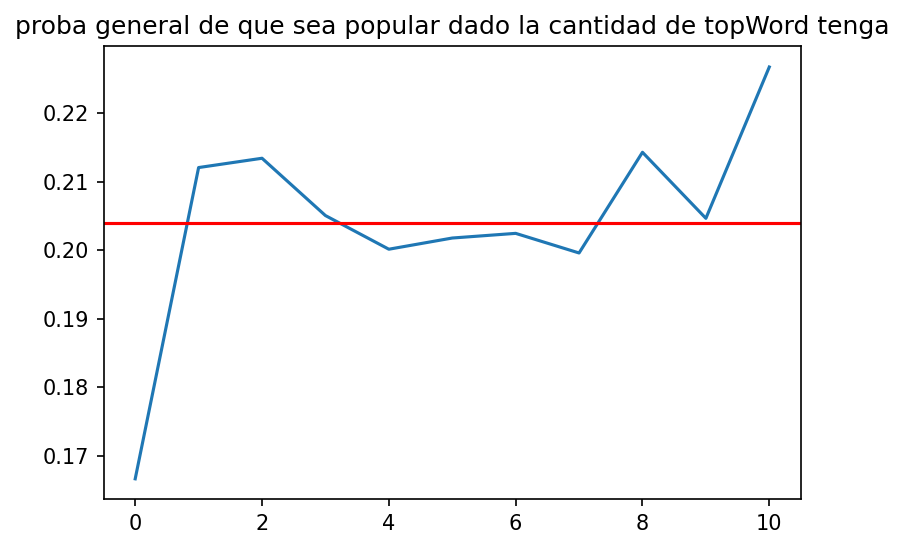

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(sum.index, sum["popular", "mean"])
plt.title("proba general de que sea popular dado la cantidad de topWord tenga")
plt.axhline(y = 0.204026, color = 'r', linestyle = '-') #recta de la p que el articulo sea popular en todos los articulos
plt.show()

entreno valid

In [ ]:
setTop10(x_train,top10,"num_top_words") #entreno con las top10 de train (seria el fit_transform)

In [ ]:
setTop10(x_valid,top10,"num_top_words") #entreno con las top10 de train (seria el transform)

In [ ]:
setTop10(x_test,top10, "num_top_words" ) #entreno con las top10 de train (seria el transform)

### cuantiles

le saco los \n y calculo el largo (en letras) del articulo, luego lo separo en cuantiles y creo una columna segun en que largo aparecen

In [ ]:
n_letters = x_train["content"].apply(lambda x: len(x.replace("\n", "")))
n_letters_valid = x_valid["content"].apply(lambda x: len(x.replace("\n", "")))
n_letters_test = x_test["content"].apply(lambda x: len(x.replace("\n", "")))

In [ ]:
n_letters.describe()

count    32095.000000
mean      2377.037545
std       2263.345231
min          8.000000
25%        953.000000
50%       1659.000000
75%       2993.500000
max      39822.000000
Name: content, dtype: float64

In [ ]:

def cuantil(numero):
  if numero < 953:
    return 1
  elif numero < 1659:
    return 2
  elif numero < 2994:
    return 3
  return 4

In [ ]:
sub["n_letters_quarter"] = n_letters.apply(lambda x: cuantil(x))

In [ ]:
quarter = sub.groupby("n_letters_quarter").agg({"popular": ["sum", "mean"]})
quarter

popular          
                      sum      mean
n_letters_quarter                  
1                    1714  0.213662
2                    1623  0.202369
3                    1594  0.198530
4                    1617  0.201520

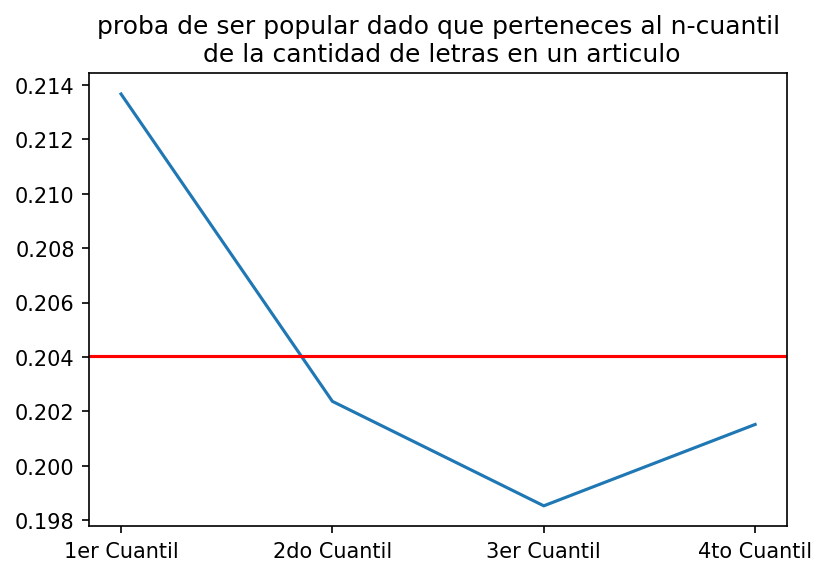

In [ ]:
plt.figure(dpi=150)
plt.plot(["1er Cuantil", "2do Cuantil", "3er Cuantil", "4to Cuantil"], quarter["popular","mean"])
plt.axhline(y = 0.204026, color = 'r', linestyle = '-') #recta de la p que el articulo sea popular en todos los articulos
plt.title("proba de ser popular dado que perteneces al n-cuantil\n de la cantidad de letras en un articulo")
plt.show()

#ayuda para este grafico - los articulos que entren en el 25% de los que tienen menos letras son mas propensos al popular , los largos tienden a no ser popular

entreno valid y test

In [ ]:
x_train["n_letters_quarter"] = sub.n_letters_quarter

In [ ]:
x_valid["n_letters_quarter"] = n_letters_valid.apply(lambda x: cuantil(x)) #con los cuantiles de train

In [ ]:
x_test["n_letters_quarter"] = n_letters_test.apply(lambda x: cuantil(x)) #con los cuantiles de train

una vez que termino todos los features de content, los elimino

In [ ]:
del x_train["content"]
del x_valid["content"]


In [ ]:
del x_test["content"]

# surprise1

In [ ]:
df["surprise1"].value_counts()

the world       24893
business         4649
sports           4103
science/tech     2018
Name: surprise1, dtype: int64

como son 4 tipos, puedo mediante OHE hacer 3 rows extra



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_surprise1 = OneHotEncoder(drop='first')
encoded_surprise1 = ohe_surprise1.fit_transform(x_train[['surprise1']]).todense().astype(int)



In [ ]:
sub

,content,surprise1,surprise2,popular,viral,num_top_words,n_letters_quarter
0,\nhaving trouble finding something to watch on...,the world,"amusement,disgust",False,0,4,2
1,"\nlas vegas -- monster, the company that launc...",sports,"amusement,disappointment",False,0,6,2
2,\nroku has secured more channels for its smart...,business,,False,0,6,2
3,\naddicted to browsing reddit? you're not alon...,the world,,False,0,5,1
4,\nthe internet's long communal nightmare may f...,the world,,False,0,5,3
...,...,...,...,...,...,...,...
32090,\nsydney -- ingenious australians -- who becau...,the world,,False,0,8,2
32091,\nhuman rights organizations are criticizing t...,the world,,False,0,7,4
32092,\nlisten. if you're crazy in love with beyonce...,the world,"disgust,optimism",True,0,4,1
32093,\nresearchers studying the remains of an enorm...,science/tech,,False,0,8,4


In [ ]:
sub = sub.join(pd.DataFrame(encoded_surprise1, columns=["surp_is_sci", "surp_is_sports","surp_is_world"]))

In [ ]:
sub

,content,surprise1,surprise2,popular,viral,num_top_words,n_letters_quarter,surp_is_sci,surp_is_sports,surp_is_world
0,\nhaving trouble finding something to watch on...,the world,"amusement,disgust",False,0,4,2,0,0,1
1,"\nlas vegas -- monster, the company that launc...",sports,"amusement,disappointment",False,0,6,2,0,1,0
2,\nroku has secured more channels for its smart...,business,,False,0,6,2,0,0,0
3,\naddicted to browsing reddit? you're not alon...,the world,,False,0,5,1,0,0,1
4,\nthe internet's long communal nightmare may f...,the world,,False,0,5,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
32090,\nsydney -- ingenious australians -- who becau...,the world,,False,0,8,2,0,0,1
32091,\nhuman rights organizations are criticizing t...,the world,,False,0,7,4,0,0,1
32092,\nlisten. if you're crazy in love with beyonce...,the world,"disgust,optimism",True,0,4,1,0,0,1
32093,\nresearchers studying the remains of an enorm...,science/tech,,False,0,8,4,1,0,0


entreno valid y test

In [ ]:
x_train = x_train.drop(['surprise1'],axis=1).join(pd.DataFrame(encoded_surprise1,  columns=["surp_is_sci", "surp_is_sports", "surp_is_world"]))

In [ ]:
encoded_surp_valid = ohe_surprise1.transform(x_valid[['surprise1']]).todense().astype(int)

In [ ]:
x_valid = x_valid.drop(['surprise1'],axis=1).join(pd.DataFrame(encoded_surp_valid,  columns=["surp_is_sci", "surp_is_sports", "surp_is_world"]))

In [ ]:
encoded_surp_test = ohe_surprise1.transform(x_test[['surprise1']]).todense().astype(int)

In [ ]:
x_test = x_test.drop(['surprise1'],axis=1).join(pd.DataFrame(encoded_surp_test,  columns=["surp_is_sci", "surp_is_sports", "surp_is_world"]))

# surprise2

propuesta: las filas que no tienen ningun sentimiento las considero totalmente neutral, el resto voy a usar un algotitmo para calcular un numero entre 0 y 1 (neutral = 0.5) (0 sentimiento negativo) (1 sentimiento positivo)

In [ ]:
len(x_train["surprise2"].dropna())

32095

In [ ]:
x_train["surprise2"] = x_train["surprise2"].apply(lambda x: x.split(",") if x else ["empty", "empty"])
x_valid["surprise2"] = x_valid["surprise2"].apply(lambda x: x.split(",") if x else ["empty", "empty"])
x_test["surprise2"] = x_test["surprise2"].apply(lambda x: x.split(",") if x else ["empty", "empty"])

In [ ]:
x_train["surprise2"]

0               [amusement, disgust]
1        [amusement, disappointment]
2                     [empty, empty]
3                     [empty, empty]
4                     [empty, empty]
                    ...             
32090                 [empty, empty]
32091                 [empty, empty]
32092            [disgust, optimism]
32093                 [empty, empty]
32094                    [joy, love]
Name: surprise2, Length: 32095, dtype: object

emociones

## Positivas

1.   amusement 
2.   excitement
3.   joy
4.   love
5.   desire
6.   optimism
7.   caring
8.   pride
9.   admiration
10.  gratitude
11.  relief
12.  approval

## Neutrales

1.   realization
2.   surprise
3.   neutral
3.   curiosity


## Negativas

1.   confusion
2.   fear
3.   nervousness
4.   remorse
5.   embarrassment 
6.   disappointment
7.   sadness
8.   grief
9.   disgust
10.   anger
11.  annoyance
12.  disapproval


Siendo la 1 positiva la mejor y la 12 negativa la peor










In [ ]:
emotions = [
"amusement", 
"excitement",
"joy",
"love",
"desire",
"optimism",
"caring",
"pride",
"admiration",
"gratitude",
"relief",
"approval",
"realization",
"surprise",
"separador", # este lo agrego por tema de que sean impares, obvio no existe en el dataset
"neutral", #aca agregue este (esta en el dataset)
"curiosity",
"confusion",
"fear",
"nervousness",
"remorse",
"embarrassment", 
"disappointment",
"sadness",
"grief",
"disgust",
"anger",
"annoyance",
"disapproval"]

len(emotions)

29

In [ ]:
def setEmotions(emotions, article):
  # la cambio para que si el articulo es mas neutral tienda a 0 y si es mas emocion (positiva o negativa) tienda a 1 
  if article == ["empty", "empty"]:
    return 0
  k=0
  for emo in article:
    ind = emotions.index(emo)
    #k = k + (28-ind)/54
    k = k + abs((ind-14))/28
  return k
  

In [ ]:
setEmotions(emotions, ["amusement", "excitement"])
# algo muy contento da valores altos

0.9642857142857143

In [ ]:
setEmotions(emotions, ["relief", "approval"])
# algo contento pero mas tirando a neutral da cercano a 0

0.25

In [ ]:
setEmotions(emotions, ["surprise", "realization"])
# algo contento pero mas tirando a neutral da cercano a 0

0.10714285714285714

In [ ]:
setEmotions(emotions, ["sadness", "anger"])
# algo con emociones mas negativas tiende a 1

0.75

In [ ]:
setEmotions(emotions, ["annoyance", "disapproval"])
# algo negativo da valores altos

0.9642857142857143

Creo la feature

In [ ]:
x_train["surp2_emotions"] = x_train["surprise2"].apply(lambda x: setEmotions(emotions,x))
x_valid["surp2_emotions"] = x_valid["surprise2"].apply(lambda x: setEmotions(emotions,x))
x_test["surp2_emotions"] = x_test["surprise2"].apply(lambda x: setEmotions(emotions,x))

In [ ]:
mean_train = x_train.join(y_train).groupby("surp2_emotions").agg({"popular":"mean"}).reset_index().rename(columns = {"surp2_emotions": "mean_by_rate"})
### groupby donde agrupo por rate y mean de popular
mean_train

,mean_by_rate,popular
0,0.000000,0.201817
1,0.178571,0.000000
2,0.321429,0.156250
3,0.357143,0.181818
4,0.392857,0.000000
5,0.428571,0.043478
6,0.428571,0.200000
7,0.464286,0.177563
8,0.500000,0.235632
9,0.535714,0.206140


In [ ]:
serie_train = (x_train.join(y_train)).merge(mean_train, left_on="popular", right_on="popular")["mean_by_rate"] # fit_transform
serie_valid = (x_valid.join(y_valid)).merge(mean_train, left_on="popular", right_on="popular")["mean_by_rate"] # mergeo con mean_train porque estan los datos de train (transform)
serie_test = (x_test.join(y_test)).merge(mean_train, left_on="popular", right_on="popular")["mean_by_rate"]

# serie para matchear los rates de cada fila

In [ ]:
x_train["surp2_emotions"] = x_train["surp2_emotions"] * serie_train
x_valid["surp2_emotions"] = x_valid["surp2_emotions"] * serie_valid
x_test["surp2_emotions"] = x_test["surp2_emotions"] * serie_test



In [ ]:
x_train["surp2_emotions"].describe()

count    32095.000000
mean         0.123655
std          0.191995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.182398
max          0.729592
Name: surp2_emotions, dtype: float64

In [ ]:
del x_train["surprise2"]
del x_valid["surprise2"]
del x_test["surprise2"]

# Exportacion a Drive

Para usarlo en la parte 3, exporto los dataframes para ya tenerlos

In [ ]:
x_train.join(y_train).to_parquet('/drive/My Drive/Orga Datos/tp3/train',
              compression='gzip',             
)

In [ ]:
x_valid.join(y_valid).to_parquet('/drive/My Drive/Orga Datos/tp3/valid',
              compression='gzip',             
)   

In [ ]:
x_test.join(y_test).to_parquet('/drive/My Drive/Orga Datos/tp3/test',
              compression='gzip',             
)   

# normalizacion de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
columns_dataset = list(x_train.columns)

In [ ]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

# Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state = 2022)

# Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
search_space = {
    "max_iter" : [3000,5000,10000,20000,30000],
    "solver" : ["lbfgs","newton-cg"],
    "penalty" : ['l2', "none"],
    "C" : [1.0, 0.1, 10],
    "multi_class": ["auto","ovr"],
    "tol": [0.0001,0.001, 0.01],
}

In [ ]:

randomModel = RandomizedSearchCV(
    estimator = model,
    param_distributions = search_space,
    scoring = "roc_auc",
    n_jobs=1,
    n_iter = 20,
    random_state=2022,
    verbose=3
)


In [ ]:
randomModel.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=10, max_iter=5000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.613 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=10, max_iter=5000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.676 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=10, max_iter=5000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.674 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=10, max_iter=5000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.684 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=10, max_iter=5000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.722 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=10, max_iter=5000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.001;, score=0.613 total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=10, max_iter=5000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.001;, score=0.676 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=10, max_iter=5000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.001;, score=0.674 total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=10, max_iter=5000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.001;, score=0.684 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=10, max_iter=5000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.001;, score=0.722 total time=   4.9s
[CV 1/5] END C=1.0, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.625 total time=   1.8s
[CV 2/5] END C=1.0, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.674 total time=   3.4s
[CV 3/5] END C=1.0, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.663 total time=   2.3s
[CV 4/5] END C=1.0, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.670 total time=   1.7s
[CV 5/5] END C=1.0, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.707 total time=   1.5s
[CV 1/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.622 total time=   1.1s
[CV 2/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.668 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=10, max_iter=20000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.613 total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=10, max_iter=20000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.676 total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=10, max_iter=20000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.674 total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=10, max_iter=20000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.684 total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=10, max_iter=20000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.722 total time=   4.3s
[CV 1/5] END C=10, max_iter=5000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.001;, score=0.627 total time=   2.8s
[CV 2/5] END C=10, max_iter=5000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.001;, score=0.678 total time=   2.4s
[CV 3/5] END C=10, max_iter=5000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.001;, score=0.671 total time=   2.3s
[CV 4/5] END C=10, max_iter=5000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.001;, score=0.680 total time=   2.5s
[CV 5/5] END C=10, max_iter=5000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.001;, score=0.719 total time=   2.8s
[CV 1/5] END C=10, max_iter=3000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.627 total time=   3.0s
[CV 2/5] END C=10, max_iter=3000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.678 total time=   2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, max_iter=10000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.01;, score=0.613 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, max_iter=10000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.01;, score=0.676 total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, max_iter=10000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.01;, score=0.674 total time=   7.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, max_iter=10000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.01;, score=0.684 total time=   6.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, max_iter=10000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.01;, score=0.722 total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.0001;, score=0.613 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.0001;, score=0.676 total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.0001;, score=0.674 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.0001;, score=0.684 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.0001;, score=0.722 total time=   5.8s
[CV 1/5] END C=1.0, max_iter=10000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.0001;, score=0.613 total time=   8.2s
[CV 2/5] END C=1.0, max_iter=10000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.0001;, score=0.676 total time=   7.1s
[CV 3/5] END C=1.0, max_iter=10000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.0001;, score=0.674 total time=   7.4s
[CV 4/5] END C=1.0, max_iter=10000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.0001;, score=0.684 total time=   6.3s
[CV 5/5] END C=1.0, max_iter=10000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.0001;, score=0.722 total time=   7.8s
[CV 1/5] END C=1.0, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.613 total time=   3.8s
[CV 2/5] END C=1.0, max_iter=3000, multi_class=ovr, penalty=none, solver=newton-cg, tol=0.001;, score=0.676 total t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.613 total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.676 total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.674 total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.684 total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg, tol=0.01;, score=0.722 total time=   4.7s
[CV 1/5] END C=10, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.01;, score=0.627 total time=   2.3s
[CV 2/5] END C=10, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.01;, score=0.678 total time=   2.0s
[CV 3/5] END C=10, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.01;, score=0.671 total time=   1.8s
[CV 4/5] END C=10, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.01;, score=0.680 total time=   2.2s
[CV 5/5] END C=10, max_iter=20000, multi_class=auto, penalty=l2, solver=newton-cg, tol=0.01;, score=0.719 total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, max_iter=5000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.01;, score=0.613 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, max_iter=5000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.01;, score=0.676 total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, max_iter=5000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.01;, score=0.674 total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, max_iter=5000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.01;, score=0.684 total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, max_iter=5000, multi_class=auto, penalty=none, solver=lbfgs, tol=0.01;, score=0.722 total time=   7.6s
[CV 1/5] END C=1.0, max_iter=20000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.001;, score=0.613 total time=   8.2s
[CV 2/5] END C=1.0, max_iter=20000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.001;, score=0.676 total time=   7.0s
[CV 3/5] END C=1.0, max_iter=20000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.001;, score=0.674 total time=   7.5s
[CV 4/5] END C=1.0, max_iter=20000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.001;, score=0.684 total time=   6.6s
[CV 5/5] END C=1.0, max_iter=20000, multi_class=ovr, penalty=none, solver=lbfgs, tol=0.001;, score=0.722 total time=   7.8s


RandomizedSearchCV(estimator=LogisticRegression(random_state=2022), n_iter=20,
                   n_jobs=1,
                   param_distributions={'C': [1.0, 0.1, 10],
                                        'max_iter': [3000, 5000, 10000, 20000,
                                                     30000],
                                        'multi_class': ['auto', 'ovr'],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['lbfgs', 'newton-cg'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=2022, scoring='roc_auc', verbose=3)

In [ ]:
randomModel.best_params_

{'C': 10,
 'max_iter': 5000,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg',
 'tol': 0.001}

In [ ]:
randomModel.best_score_

0.674995348932352

In [ ]:
dfR = pd.DataFrame(randomModel.cv_results_).sort_values("rank_test_score")
dfR = dfR[["param_C","param_max_iter", "param_multi_class", "param_penalty", "param_solver", "param_tol" ,"mean_test_score",  "rank_test_score" ]]
dfR.to_csv('/drive/My Drive/Orga Datos/tp3/resultsRandomSearch.csv')

dfR

,param_C,param_max_iter,param_multi_class,param_penalty,param_solver,param_tol,mean_test_score,rank_test_score
10,10,5000,auto,l2,newton-cg,0.001,0.674995,1
11,10,3000,auto,l2,newton-cg,0.0001,0.674995,2
17,10,20000,auto,l2,newton-cg,0.01,0.674993,3
5,10,5000,ovr,l2,newton-cg,0.01,0.674993,3
9,10,20000,auto,none,newton-cg,0.01,0.673936,5
16,0.1,3000,auto,none,newton-cg,0.01,0.673936,5
7,1.0,10000,ovr,none,newton-cg,0.01,0.673936,5
13,0.1,3000,ovr,none,newton-cg,0.0001,0.673929,8
15,1.0,3000,ovr,none,newton-cg,0.001,0.673928,9
0,10,5000,ovr,none,newton-cg,0.001,0.673928,9


# Prediccion vs Valid

In [ ]:
bestModel = randomModel.best_estimator_

In [ ]:
bestModel.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=5000, random_state=2022, solver='newton-cg',
                   tol=0.001)

In [ ]:
preds = bestModel.predict(x_valid)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
print(classification_report(preds, y_valid))

              precision    recall  f1-score   support

       False       0.97      0.84      0.90      3428
        True       0.10      0.46      0.17       138

    accuracy                           0.82      3566
   macro avg       0.54      0.65      0.53      3566
weighted avg       0.94      0.82      0.87      3566



In [ ]:
roc_auc_score(y_valid, bestModel.predict_proba(x_valid)[:,1])

0.6845834750085006

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


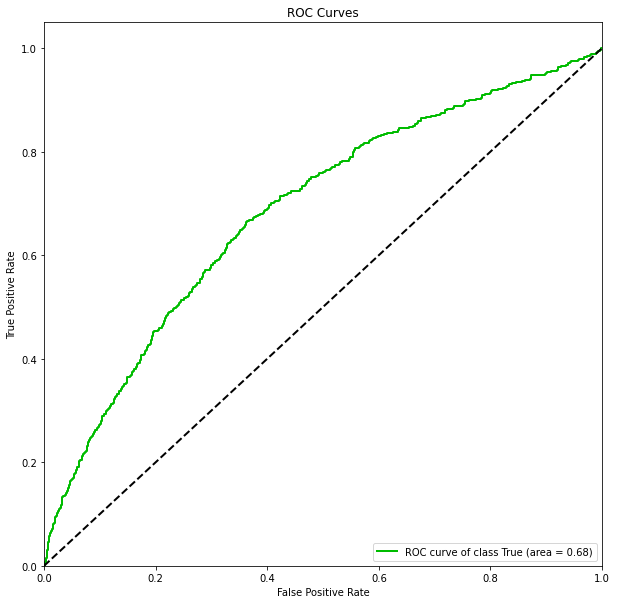

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_valid, bestModel.predict_proba(x_valid), classes_to_plot= 1,plot_micro= False, plot_macro = False, figsize = (10,10))
plt.rcParams.update({'text.color': "blue",
                     'axes.labelcolor': "white"})

plt.show()

# Prediccion vs Test

In [ ]:
test_preds = bestModel.predict(x_test)

In [ ]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

       False       0.63      0.92      0.75      2315
        True       0.70      0.26      0.38      1665

    accuracy                           0.64      3980
   macro avg       0.67      0.59      0.57      3980
weighted avg       0.66      0.64      0.60      3980



In [ ]:
roc_auc_score(y_test, bestModel.predict_proba(x_test)[:,1])

0.710033884769129

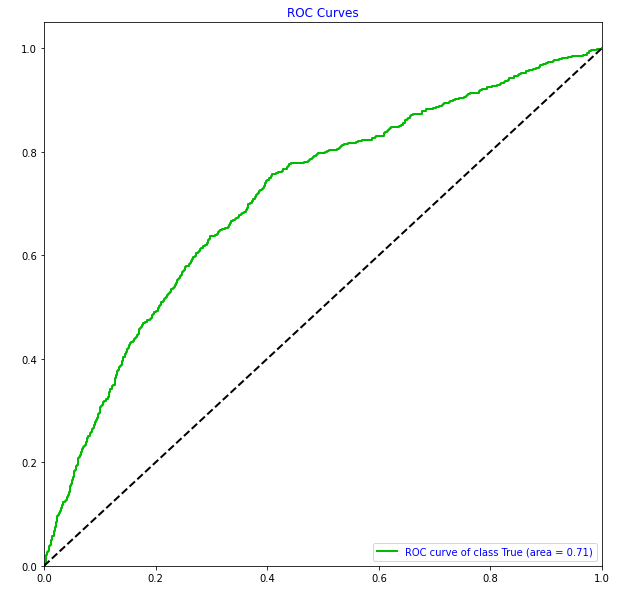

In [ ]:
skplt.metrics.plot_roc(y_test, bestModel.predict_proba(x_test), classes_to_plot= 1,plot_micro= False, plot_macro = False, figsize = (10,10))
plt.rcParams.update({'text.color': "blue",
                     'axes.labelcolor': "white"})

plt.show()

## Exportacion a CSV

In [ ]:
probas = bestModel.predict_proba(x_test)[:,1]
dfProbas = pd.DataFrame(probas, columns=["proba_popular"])

In [ ]:
urls = (test.drop(na_values_test).reset_index())[["url"]]
joined = urls.join(dfProbas)
joined

,url,proba_popular
0,http://mashable.com/2014/10/28/dress-up-willow...,0.349779
1,http://mashable.com/2014/10/28/survivor-episod...,0.271065
2,http://mashable.com/2014/10/28/uk-weather-supe...,0.400587
3,http://mashable.com/2014/10/28/turkey-mine-col...,0.436048
4,http://mashable.com/2014/10/28/tumblr-yahoo-vi...,0.618810
...,...,...
3975,http://mashable.com/2014/12/27/samsung-app-aut...,0.558960
3976,http://mashable.com/2014/12/27/seth-rogen-jame...,0.806385
3977,http://mashable.com/2014/12/27/son-pays-off-mo...,0.845280
3978,http://mashable.com/2014/12/27/ukraine-blasts/,0.106069


In [ ]:
joined.to_csv('/drive/My Drive/Orga Datos/tp3/probas_regresion_logistica.csv')

# Feature Engineering

In [ ]:
k = []
for i in range(len(bestModel.coef_[0])):
  k.append([bestModel.coef_[0][i],columns_dataset[i]])
k


[[0.18242394103534626, 'n_tokens_title'],
 [0.5634323256207369, 'n_tokens_content'],
 [-0.34579119661826657, 'n_unique_tokens'],
 [-0.22525503162806165, 'n_non_stop_words'],
 [-0.07951305325749695, 'n_non_stop_unique_tokens'],
 [1.2623364330405256, 'num_hrefs'],
 [-1.5356523662403971, 'num_self_hrefs'],
 [0.6453478766963007, 'num_imgs'],
 [0.7100704381840336, 'num_videos'],
 [-0.04671904221553111, 'average_token_length'],
 [0.32982092811405117, 'num_keywords'],
 [-0.14358082876601994, 'data_channel_is_lifestyle'],
 [-0.3601115977821371, 'data_channel_is_entertainment'],
 [-0.5801336641650143, 'data_channel_is_bus'],
 [0.20648792172875358, 'data_channel_is_socmed'],
 [0.16957208527815604, 'data_channel_is_tech'],
 [-0.19212623641023052, 'data_channel_is_world'],
 [0.23306301331377097, 'kw_min_min'],
 [0.6933519544611206, 'kw_max_min'],
 [-3.7005556587514876, 'kw_avg_min'],
 [-0.560169360610325, 'kw_min_max'],
 [-0.043216394719834204, 'kw_max_max'],
 [-0.3124292457902148, 'kw_avg_max'],


In [ ]:
coef = pd.DataFrame(k, columns=["coef", "column"])

In [ ]:
coef["abs"] = coef["coef"].apply(lambda x: abs(x))

In [ ]:
coef = coef.sort_values("abs", ascending=False)

In [ ]:
coef.iloc[:10]

,coef,column,abs
25,20.708361,kw_avg_avg,20.708361
24,-15.517099,kw_max_avg,15.517099
19,-3.700556,kw_avg_min,3.700556
26,2.614052,self_reference_min_shares,2.614052
6,-1.535652,num_self_hrefs,1.535652
39,-1.414089,LDA_02,1.414089
5,1.262336,num_hrefs,1.262336
38,-1.089827,LDA_01,1.089827
41,-0.979002,LDA_04,0.979002
42,0.971897,global_subjectivity,0.971897


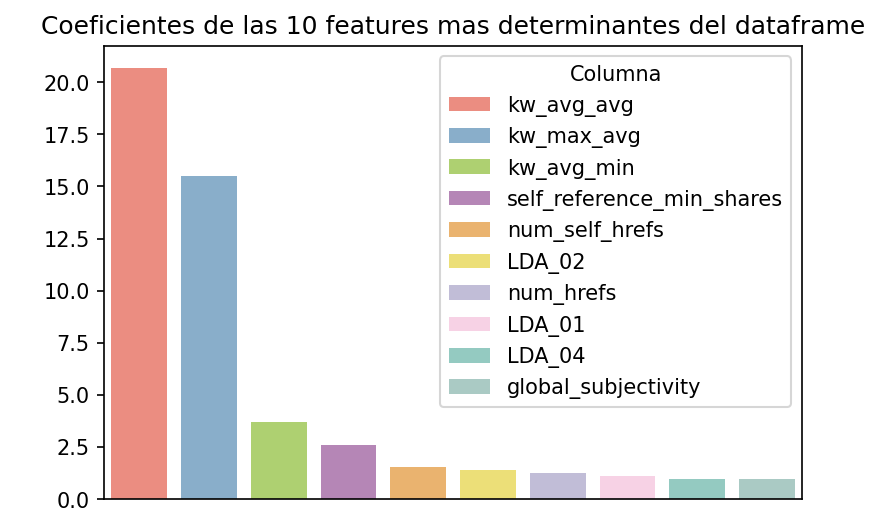

In [162]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#a5cfc8"]
plt.figure(dpi=150)
plt.title("Coeficientes de las 10 features mas determinantes del dataframe")
sns.barplot(data=coef.iloc[:10],x="column", y= "abs", palette=colors, hue='column', dodge=False)
plt.ylabel("Peso")
plt.xlabel("")
plt.xticks([])
plt.rcParams.update({'text.color': "black"})
plt.legend(title="Columna")


Calculos para comparar con la parte III

In [ ]:
total = coef["abs"].sum()

In [ ]:
total

63.55342628393984

In [ ]:
coef["Porcentaje"] = coef["abs"].apply(lambda x: x/total)

In [ ]:
coef[["column", "Porcentaje"]].iloc[:10]

,column,Porcentaje
25,kw_avg_avg,0.325842
24,kw_max_avg,0.244158
19,kw_avg_min,0.058227
26,self_reference_min_shares,0.041132
6,num_self_hrefs,0.024163
39,LDA_02,0.022250
5,num_hrefs,0.019863
38,LDA_01,0.017148
41,LDA_04,0.015404
42,global_subjectivity,0.015293
